In [2]:
from torchvision import transforms
from torchvision.datasets import OxfordIIITPet

train_set = OxfordIIITPet(root="pets_data", split="trainval", target_types="segmentation", download=True)

test_set = OxfordIIITPet(root="pets_data", split="test", target_types="segmentation", download=True)

100%|███████████████████████████████████████████████████████████████| 791918971/791918971 [05:29<00:00, 2405859.14it/s]


Extracting pets_data\oxford-iiit-pet\images.tar.gz to pets_data\oxford-iiit-pet


100%|██████████████████████████████████████████████████████████████████| 19173078/19173078 [01:10<00:00, 271354.29it/s]


Extracting pets_data\oxford-iiit-pet\annotations.tar.gz to pets_data\oxford-iiit-pet


In [3]:
import cv2

data = cv2.imread('pets_data/oxford-iiit-pet/annotations/trimaps/Abyssinian_1.png', 0)
print(data.shape)

(400, 600)


In [45]:
data.min()

1

In [46]:
data.max()

3

In [52]:
data[:,:].tolist()

[[2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


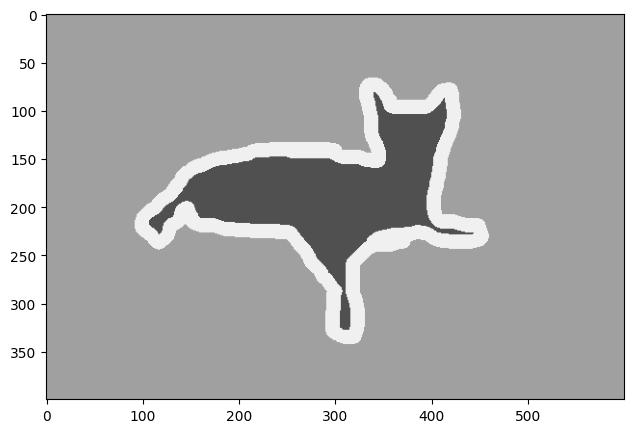

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(data*80)
plt.show()

In [12]:
import cv2

data = cv2.imread('pets_data/oxford-iiit-pet/images/Abyssinian_1.jpg')
print(data.shape)

(400, 600, 3)


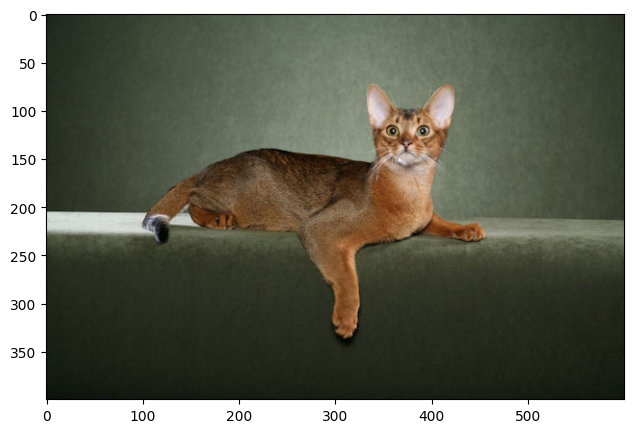

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(data, cv2.COLOR_BGR2RGB))
plt.show()

In [85]:
from torchvision import transforms
from torchvision.datasets import OxfordIIITPet

img_size = (128, 128)
num_classes = 3

transform = transforms.Compose([
              transforms.Resize(img_size),
              transforms.ToTensor(),
              transforms.Normalize((0.485, 0.456, 0.406),
                                   (0.229, 0.224, 0.225))
])

# Label preprocessing
def target_transform(target):
    img = transforms.Resize(img_size)(target)
    img = transforms.functional.pil_to_tensor(img).squeeze_()
    #img = np.array(img)
    #img = torch.from_numpy(img).to(int) - 1
    #img = F.one_hot(img, num_classes=num_classes)
    #img = img.permute(2, 0, 1)
    img = img.to(torch.float)
    return img


train_set = OxfordIIITPet(root="pets_data", split="trainval", target_types="segmentation",
                             transform=transform,
                             target_transform=target_transform,
                             download=True)

test_set = OxfordIIITPet(root="pets_data", split="test", target_types="segmentation",
                        transform=transform,
                        target_transform=target_transform,
                        download=True)

In [86]:
(train_set[0][1].shape)

torch.Size([128, 128])

In [41]:
from torch.utils.data import DataLoader
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

batch_size = 64
train_loader = DataLoader(train_set, 
                          batch_size=batch_size, 
                          shuffle=True, 
                          num_workers=6)
test_loader = DataLoader(test_set, 
                         batch_size=batch_size, 
                         num_workers=6)

In [42]:
for inputs, labels in test_loader:
    print(labels.shape)
    break

torch.Size([64, 128, 128])
